<a href="https://colab.research.google.com/github/jaeohshin/keras/blob/main/tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)
type(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


tensorflow.python.framework.ops.EagerTensor

In [3]:
x = tf.random.normal(shape=(5, 3), mean = 100., stddev=15.)
print(x)

tf.Tensor(
[[ 89.15847   97.41935  101.57151 ]
 [102.064255 112.274666 110.65499 ]
 [103.40687  115.51243   81.14862 ]
 [114.868774  72.09801   88.75982 ]
 [ 94.43213  109.74302  108.48897 ]], shape=(5, 3), dtype=float32)


In [5]:
x = tf.ones(shape=(2, 2))


In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.4385547],
       [0.9642575],
       [1.3297579]], dtype=float32)>


In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [10]:
type(v)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [ ]:
v[0, 0].assign(3000000)

In [ ]:
print(v)

In [ ]:
v.assign_add(tf.ones((3, 2)))

In [ ]:
tf.ones

In [ ]:
a = tf.ones(2)

In [ ]:
print(a)

In [ ]:
a = tf.ones((2,2))

In [ ]:
print(a)

In [ ]:
b = tf.square(a)
c = tf.sqrt(a)
d= b + c
e = tf.matmul(a, b)

In [ ]:
print(b)

In [ ]:
print(c)

In [ ]:
print(d)

In [ ]:
print(e)

In [ ]:
e *= d

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.sqrt(input_var)
gradient = tape.gradient(result, input_var)

print(gradient)

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [ ]:
print(speed)

In [ ]:
print(acceleration)

# Below is a linear classificier from scratch!

In [11]:
import numpy as np
from matplotlib import pyplot as plt

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], 
                    cov=[[1, 0.5], [0.5, 1]],
                    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], 
                    cov=[[1, 0.5], [0.5, 1]],
                    size=num_samples_per_class)

In [12]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

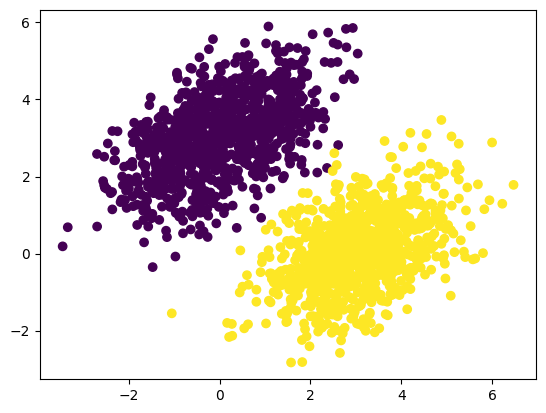

In [14]:
plt.scatter(inputs[:, 0], inputs[:,1], c=targets[:, 0])
plt.show()

In [15]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [16]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [17]:
def square_loss(targets, predictions) :
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [20]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [30]:
for step in range(10):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0267
Loss at step 1: 0.0267
Loss at step 2: 0.0267
Loss at step 3: 0.0267
Loss at step 4: 0.0267
Loss at step 5: 0.0267
Loss at step 6: 0.0267
Loss at step 7: 0.0267
Loss at step 8: 0.0267
Loss at step 9: 0.0267


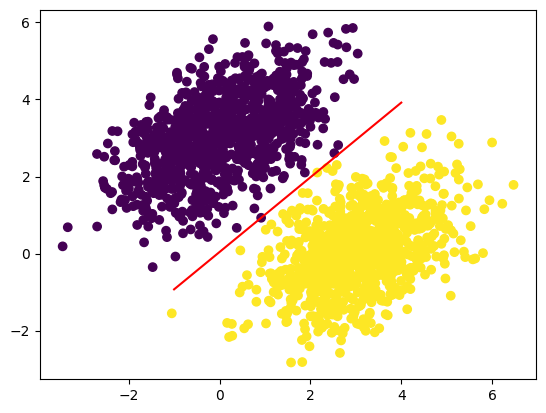

In [31]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
x = np.linspace(-1, 4, 100)
y = -W[0]/ W[1] * x + (0.5 - b)/ W[1]
plt.plot(x,y, "-r")
plt.show()
